# Segmentation tasks

The following notebook performs the semantic segmentation task on 4 sets of images:
- raw images
- noisy augmented images
- denoised augmented images
- denoised raw images

It will make use of a list of models and compute metrics on them.

In [1]:
%load_ext autoreload
%autoreload 2

from models_loading import *
from data_loading import * 
from tasks_loading import *
from metrics_loading import *
from time_loading import *

from utils import *

# Used for tests purpose
import torch

In [2]:
start = start_timer()

## Models

### Models loading

In [3]:
load_model("", list_available=True)

# sinet = load_model("SINet").eval()
unet = load_model("UNet").eval()

Available models aliases:
  SINet
  UNet


In [4]:
# Fake data
x = torch.randn(1, 3, 1024, 2048)

In [5]:
# y = sinet(x)
# print(y.shape)
# y = unet(x)
# print(y.shape)

### Data Loading

In [6]:
# Set here the directories locations to the data for the evaluation task

cityscapes_dir = 'HRNet/data/cityscapes'
denoized_dir = '../candidate_model_predictions'
# cityscapes_distorted_dir = 'HRNet/data/cityscapes'

In [8]:
load_data("", list_available=True)

# cs = load_data("cityscapes", location=cityscapes_dir)

Available dataloaders aliases:
  cityscapes
  foggy_cityscapes
  rainy_cityscapes


../data/zipped_data/weather_cityscapes_leftImg8bit_train_fog_transmittance/weather_cityscapes/leftImg8bit/train/fog_transmittance/30m/aachen_000000_000019_leftImg8bit.png


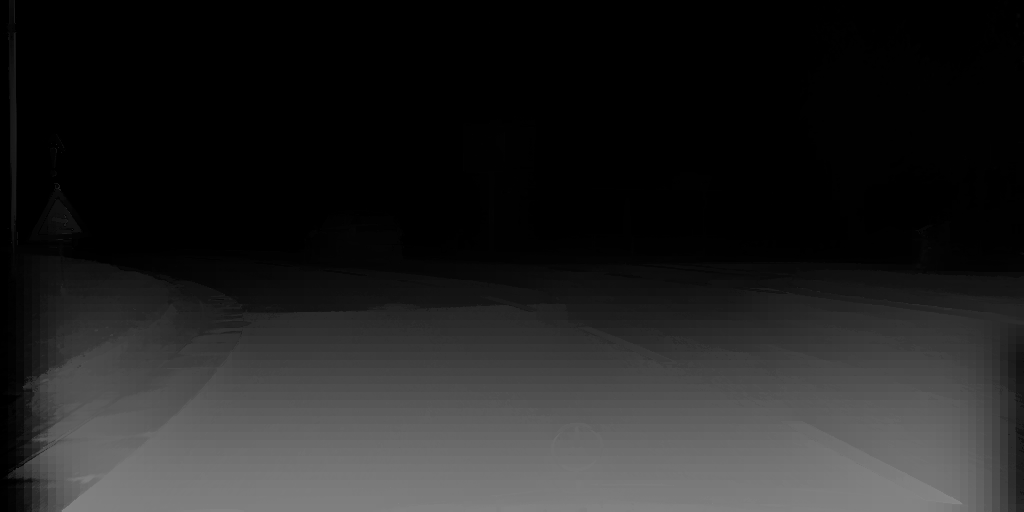

In [11]:
from dataloaders.RainyCityscapes import RainyCityscapes
from dataloaders.FoggyCityscapes import FoggyCityscapes


foggy_dir = '../data/zipped_data/weather_cityscapes_leftImg8bit_train_fog_transmittance/weather_cityscapes'
rainy_dir = '../data/zipped_data/weather_cityscapes'

# wcs = RainyCityscapes('../data/zipped_data/weather_cityscapes', cityscapes_dir)
# wcs = FoggyCityscapes('../data/zipped_data/weather_cityscapes_leftImg8bit_train_fog_transmittance/weather_cityscapes', cityscapes_dir)

wcs = load_data("foggy_cityscapes", location = foggy_dir, main_data_location=cityscapes_dir)
wcs = load_data("rainy_cityscapes", location= rainy_dir, main_data_location=cityscapes_dir)

wcs[0][0]

### Evaluation Task

In [ ]:
load_tasks("", list_available=True)

semantic_task = load_tasks("semantic")

semantic_unet = semantic_task(unet)
# semantic_sinet = semantic_task(sinet)

In [ ]:
y = semantic_unet(x)
y.shape

In [ ]:
# y = semantic_unet(x)
y, colored = semantic_unet(x, get_colored=True)
y, classified = semantic_unet(x, get_classification=True)
y.shape, classified.shape, colored.shape

### Metrics

In [ ]:
load_metrics("", list_available=True)

iou = load_metrics("iou")
dice = load_metrics("dice")

In [ ]:
print(dice(y, torch.from_numpy(classified)))
print(iou(y, torch.from_numpy(classified)))

In [ ]:
store_results(colored, 'output/')
store_results(x, "output/", "sample_")

In [ ]:
# stopping timer
end = end_timer()
time_spent = time_for_report(start, end)


In [ ]:
report = Report()

report.add_dataset("Cityscapes")
report.add_task_model('UNet', 'semantic')
report.add_task_model('SINet', 'semantic')

report.add_metric('dice', '98.12%', "RAW")
report.add_metric('dice', '98.12%', "DENOISED")
report.add_metric('dice', '98.12%', "RAW_NOISY")
report.add_metric('dice', '98.12%', "NOISY_DENOISED")

report.add_time_spent(time_spent)

report.add_metric('iou', '12.12%', 'RAW')

print(report.generate(path='reports/', as_string=True))